# Importing libaries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from data_cleaning import data_cleaner

# Importing data

In [2]:
cardio_data = pd.read_csv('data/cardio_data_clean.csv')

# EDA

## Does Gender effect the likelihood of disease?

In [3]:
cardio_data.groupby('gender')['disease'].mean().round(3)
# not significant

gender
0    0.498
1    0.505
Name: disease, dtype: float64

## Does Alcohol Status effect the likelihood of disease?

In [4]:
cardio_data.groupby('alcohol_status')['disease'].mean().round(3)
# not significant

alcohol_status
0    0.501
1    0.481
Name: disease, dtype: float64

## Does Smoking Status effect the likelihood of disease?

In [5]:
cardio_data.groupby('smoking_status')['disease'].mean().round(3)
# not significant

smoking_status
0    0.503
1    0.474
Name: disease, dtype: float64

## Does Activity Level effect the likelihood of disease?

In [6]:
cardio_data.groupby('activity_level')['disease'].mean().round(3)
# not significant

activity_level
0    0.538
1    0.491
Name: disease, dtype: float64

## Does Cholesterol Level effect the likelihood of disease?

In [7]:
cardio_data.groupby('cholesterol_level')['disease'].mean().round(3)
# likelihood of disease increases as cholesterol level increases

cholesterol_level
1    0.441
2    0.601
3    0.766
Name: disease, dtype: float64

## Does Glucose Level effect the likelihood of disease?

In [8]:
cardio_data.groupby('glucose_level')['disease'].mean().round(3)
# likelihood of disease increases as glucose level increases

glucose_level
1    0.481
2    0.592
3    0.622
Name: disease, dtype: float64

## Does Age effect the likelihood of disease?

In [9]:
min_age, max_age = cardio_data['age'].min(), cardio_data['age'].max()
cardio_data_copy = cardio_data.copy()
# converting ages into categories
cardio_data_copy['age_category'] = pd.cut(cardio_data_copy['age'], bins = [min_age-1,40,45,50,55,60,max_age+1], labels = ['under 40', '40-45', '45-50', '50-55', '55-60', 'over 60'])
cardio_data_copy.groupby(['age_category'])['disease'].mean().round(3)
# likelihood of disease increases as age increases

age_category
under 40    0.228
40-45       0.349
45-50       0.425
50-55       0.497
55-60       0.573
over 60     0.700
Name: disease, dtype: float64

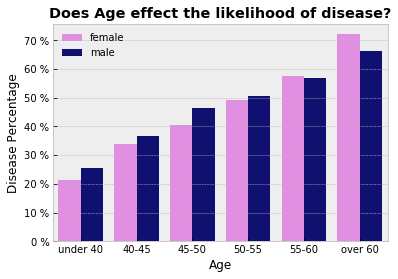

In [10]:
cardio_data_copy['gender_name'] = cardio_data_copy['gender'].map(lambda x: 'male' if x == 1 else 'female')
gender_age_grouped = pd.DataFrame(cardio_data_copy.groupby(['gender_name', 'age_category'])['disease'].mean().round(3)).reset_index()

plt.style.use('bmh')

fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(x = 'age_category', y='disease', hue = 'gender_name', data = gender_age_grouped, palette = ['violet', 'navy'], ax = ax)
ax.set_title('Does Age effect the likelihood of disease?', fontweight = 'bold')
ax.set_xlabel('Age')
ax.set_ylabel('Disease Percentage')
ax.set_yticklabels(['{} %'.format(x) for x in range(0,80,10)])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[2:], labels=labels[2:])
ax.legend(frameon=False)
plt.close(2);

## Does BMI effect the likelihood of disease?

In [11]:
min_bmi, max_bmi = cardio_data['bmi'].min(), cardio_data['bmi'].max()
cardio_data_copy['bmi_zone'] = pd.cut(cardio_data_copy['bmi'], bins = [min_bmi-1,17.5,25,30,max_bmi+1], labels = ['underweight', 'normal weight', 'overweight', 'obese'])
cardio_data_copy.groupby('bmi_zone')['disease'].mean().round(3)
# likelihood of disease increases as bmi increases

bmi_zone
underweight      0.273
normal weight    0.402
overweight       0.511
obese            0.629
Name: disease, dtype: float64

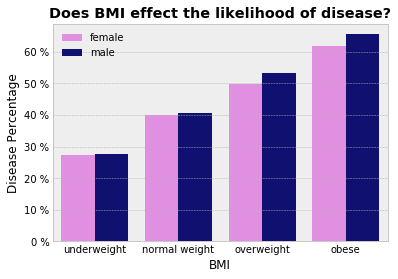

In [12]:
gender_bmi_grouped = pd.DataFrame(cardio_data_copy.groupby(['gender_name', 'bmi_zone'])['disease'].mean().round(3)).reset_index()

fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(x = 'bmi_zone', y='disease', hue = 'gender_name', data = gender_bmi_grouped, palette = ['violet', 'navy'], ax = ax)
ax.tick_params(axis= 'both', which= 'both',length = 0)
ax.set_yticklabels(['{} %'.format(x) for x in range(0,80,10)])
ax.set_title('Does BMI effect the likelihood of disease?', fontweight = 'bold')
ax.set_xlabel('BMI')
ax.set_ylabel('Disease Percentage')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[2:], labels=labels[2:])
ax.legend(frameon=False)
plt.close(2);

## Does Diastolic Blood Pressure effect the likelihood of disease?

In [13]:
min_diastolic_bp, max_diastolic_bp = cardio_data['blood_pressure_min'].min(), cardio_data['blood_pressure_min'].max()
cardio_data_copy['diastolic_zone'] = pd.cut(cardio_data_copy['blood_pressure_min'], bins = [min_diastolic_bp-1,80,90,120,max_diastolic_bp+1], labels = ['normal', 'stage 1', 'stage 2', 'stage 3'])
cardio_data_copy.groupby('diastolic_zone')['disease'].mean().round(3)
# likelihood of disease increases as diastolic blood pressure increases

diastolic_zone
normal     0.390
stage 1    0.745
stage 2    0.837
stage 3    0.875
Name: disease, dtype: float64

## Does Systolic Blood Pressure effect the likelihood of disease?

In [14]:
min_systolic_bp, max_systolic_bp = cardio_data['blood_pressure_max'].min(), cardio_data['blood_pressure_max'].max()
cardio_data_copy['systolic_zone'] = pd.cut(cardio_data_copy['blood_pressure_max'], bins = [min_systolic_bp-1,120,140,180,max_systolic_bp+1], labels = ['normal', 'stage 1', 'stage 2', 'stage 3'])
cardio_data_copy.groupby('systolic_zone')['disease'].mean().round(3)
# likelihood of disease increases as systolic blood pressure increases

systolic_zone
normal     0.322
stage 1    0.702
stage 2    0.861
stage 3    0.843
Name: disease, dtype: float64

## Which patient sub-groups are most at risk of disease?

In [16]:
sub_groups = [('female', 0.498), ('male', 0.505), ('non alcohol drinker', 0.501), ('alcohol drinker', 0.481), ('non active', 0.538), ('active', 0.491), ('normal cholesterol', 0.441), ('high cholesterol', 0.601), ('very high cholesterol', 0.766), ('normal glucose', 0.481), ('high glucose', 0.592), ('very high glucose', 0.622), ('under 40 years', 0.228), ('40-45 years', 0.349), ('45-50 years', 0.425), ('50-55 years', 0.497), ('55-60 years', 0.573), ('over 60 years', 0.7), ('underweight', 0.271), ('normal weight', 0.402), ('overweight', 0.511), ('obese', 0.629), ('normal dialostic blood pressure', 0.390), ('high dialostic blood pressure (stage 1)', 0.745), ('high dialostic blood pressure (stage 2)', 0.837), ('high dialostic blood pressure (stage 3)', 0.875), ('normal systolic blood pressure', 0.322), ('high systolic blood pressure (stage 1)', 0.702), ('high systolic blood pressure (stage 2)', 0.861), ('high systolic blood pressure (stage 3)', 0.843)]

sub_groups_sorted = pd.DataFrame(sub_groups, columns = ['Group', 'Disease Proportion']).sort_values(by = 'Disease Proportion', ascending = False).reset_index().drop(columns = ['index'])
sub_groups_sorted.head(12)
# patients with high blood pressure are most at risk of disease

,Group,Disease Proportion
0,high dialostic blood pressure (stage 3),0.875
1,high systolic blood pressure (stage 2),0.861
2,high systolic blood pressure (stage 3),0.843
3,high dialostic blood pressure (stage 2),0.837
4,very high cholesterol,0.766
5,high dialostic blood pressure (stage 1),0.745
6,high systolic blood pressure (stage 1),0.702
7,over 60 years,0.700
8,obese,0.629
9,very high glucose,0.622
